In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [18]:
df2 = pd.read_csv('deliveries.csv')
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
season = df[['id','season']].merge(df2,left_on='id',right_on='match_id',how='left').drop('id',axis=1)
season

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [33]:
season = season.groupby('season')['total_runs'].sum().reset_index()
season.set_index('season',inplace=True)

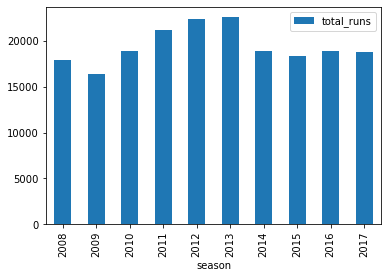

In [34]:
season.plot(kind='bar')

In [36]:
season = season.reset_index()
season[:5]

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453


In [37]:
avg_runs = df.groupby('season')['id'].count().reset_index().rename(columns={'id':'matches'})
avg_runs

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [40]:
season = pd.concat([avg_runs,season.iloc[:,1]],axis=1)

In [41]:
season['per_match_runs'] = season['total_runs']/season['matches']

In [42]:
season

,season,matches,total_runs,per_match_runs
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


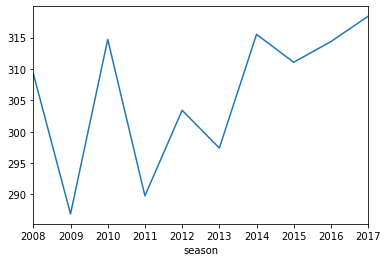

In [47]:
season.set_index('season')['per_match_runs'].plot()

In [49]:
def teams(df,team_name):
    return df[df['winner']==team_name]['venue'].value_counts().nlargest(5)

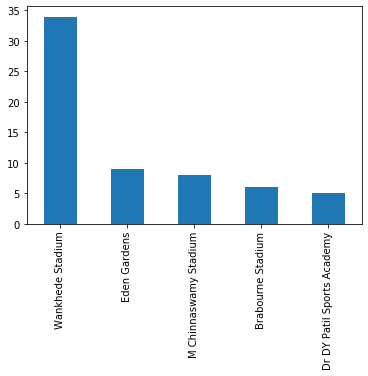

In [52]:
teams(df,'Mumbai Indians').plot(kind='bar')

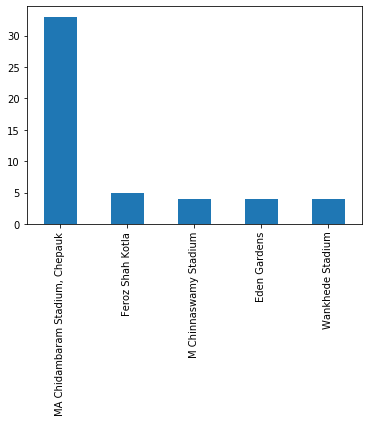

In [53]:
teams(df,'Chennai Super Kings').plot(kind='bar')

In [64]:
def comparison(team1, team2):
    compare = df[((df['team1']==team1)|(df['team2']==team1))&((df['team1']==team2)|(df['team2']==team2))]
    sns.countplot(x='season',hue='winner',data=compare)

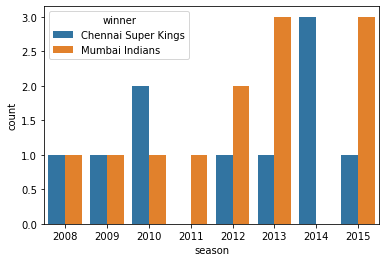

In [65]:
comparison('Mumbai Indians','Chennai Super Kings')